In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv("census_data.csv")

In [5]:
rows_columns=dataset.shape

In [6]:
rows_columns

(2708, 15)

In [7]:
dataset[' annual-income'].fillna(method='ffill',inplace=True)

In [8]:
dataset[' annual-income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
2703     <=50K
2704     <=50K
2705     <=50K
2706     <=50K
2707     <=50K
Name:  annual-income, Length: 2708, dtype: object

In [9]:
dataset[' sex'].fillna(method='ffill',inplace=True)

In [8]:
dataset[' sex']

0          Male
1          Male
2          Male
3          Male
4        Female
         ...   
2703       Male
2704     Female
2705     Female
2706       Male
2707       Male
Name:  sex, Length: 2708, dtype: object

In [9]:
dataset[' workclass'].fillna(method='ffill',inplace=True)
dataset[' workclass']

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
              ...        
2703              Private
2704              Private
2705              Private
2706            Local-gov
2707     Self-emp-not-inc
Name:  workclass, Length: 2708, dtype: object

In [10]:
dataset.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      1
 capital-loss      1
 hours-per-week    1
 native-country    1
 annual-income     0
dtype: int64

In [11]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 annual-income     0
dtype: int64

In [12]:
dataset.shape

(2707, 15)

In [13]:
dataset.drop_duplicates(subset=None, inplace=True)

In [14]:
dataset.shape

(2707, 15)

In [15]:
dataset.drop(dataset[dataset['age'] == ' ?'].index, inplace = True)

In [16]:
dataset.shape

(2707, 15)

In [17]:
dataset.drop(dataset[dataset[' workclass'] == ' ?'].index, inplace = True)

In [18]:
dataset.shape

(2529, 15)

In [19]:
dataset.drop(dataset[dataset[' fnlwgt'] == ' ?'].index, inplace = True)

In [20]:
dataset.shape

(2529, 15)

In [21]:
dataset.drop(dataset[dataset[' education'] == ' ?'].index, inplace = True)

In [22]:
dataset.shape

(2529, 15)

In [23]:
dataset.drop(dataset[dataset[' education-num'] == ' ?'].index, inplace = True)

In [24]:
dataset.shape

(2529, 15)

In [25]:
dataset.drop(dataset[dataset[' marital-status'] == ' ?'].index, inplace = True)

In [26]:
dataset.shape

(2529, 15)

In [27]:
dataset.drop(dataset[dataset[' occupation'] == ' ?'].index, inplace = True)

In [28]:
dataset.shape

(2529, 15)

In [29]:
dataset.drop(dataset[dataset[' relationship'] == ' ?'].index, inplace = True)
dataset.shape

(2529, 15)

In [30]:
dataset.drop(dataset[dataset[' race'] == ' ?'].index, inplace = True)
dataset.shape

(2529, 15)

In [31]:
dataset.drop(dataset[dataset[' sex'] == ' ?'].index, inplace = True)
dataset.shape

(2529, 15)

In [32]:
dataset.drop(dataset[dataset[' native-country'] == ' ?'].index, inplace = True)
dataset.shape

(2482, 15)

In [33]:
dataset.drop(dataset[dataset[' capital-gain'] == ' ?'].index, inplace = True)
dataset.shape

(2482, 15)

In [34]:
dataset.drop(dataset[dataset[' capital-loss'] == ' ?'].index, inplace = True)
dataset.shape

(2482, 15)

In [35]:
dataset.drop(dataset[dataset[' hours-per-week'] == ' ?'].index, inplace = True)
dataset.shape

(2482, 15)

In [36]:
dataset.drop(dataset[dataset[' annual-income'] == ' ?'].index, inplace = True)
dataset.shape

(2482, 15)

In [37]:
dataset=dataset.sample(700,replace=False,axis=0)
dataset.shape

(700, 15)

In [38]:
import pandas as pd
import numpy as np
df = pd.DataFrame(dataset)
x_data= df[[' hours-per-week',' education-num',' capital-gain',' capital-loss']]
x_data= x_data.apply(lambda x:(x -x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0)))
print(x_data.head(50))


       hours-per-week   education-num   capital-gain   capital-loss
2116         0.546392        0.500000       0.000000       0.691097
200          0.391753        0.857143       0.000000       0.776812
1321         0.288660        0.571429       0.000000       0.000000
905          0.371134        0.500000       0.000000       0.000000
1734         0.494845        0.642857       0.000000       0.000000
1617         0.340206        0.571429       0.000000       0.000000
2053         0.494845        0.571429       0.000000       0.000000
663          0.371134        0.857143       0.000000       0.000000
1365         0.391753        0.500000       0.000000       0.000000
852          0.494845        0.500000       0.000000       0.000000
1857         0.061856        0.500000       0.000000       0.000000
2494         0.494845        0.500000       0.000000       0.000000
286          0.597938        0.928571       0.000000       0.000000
854          0.494845        1.000000       0.00

<BarContainer object of 700 artists>

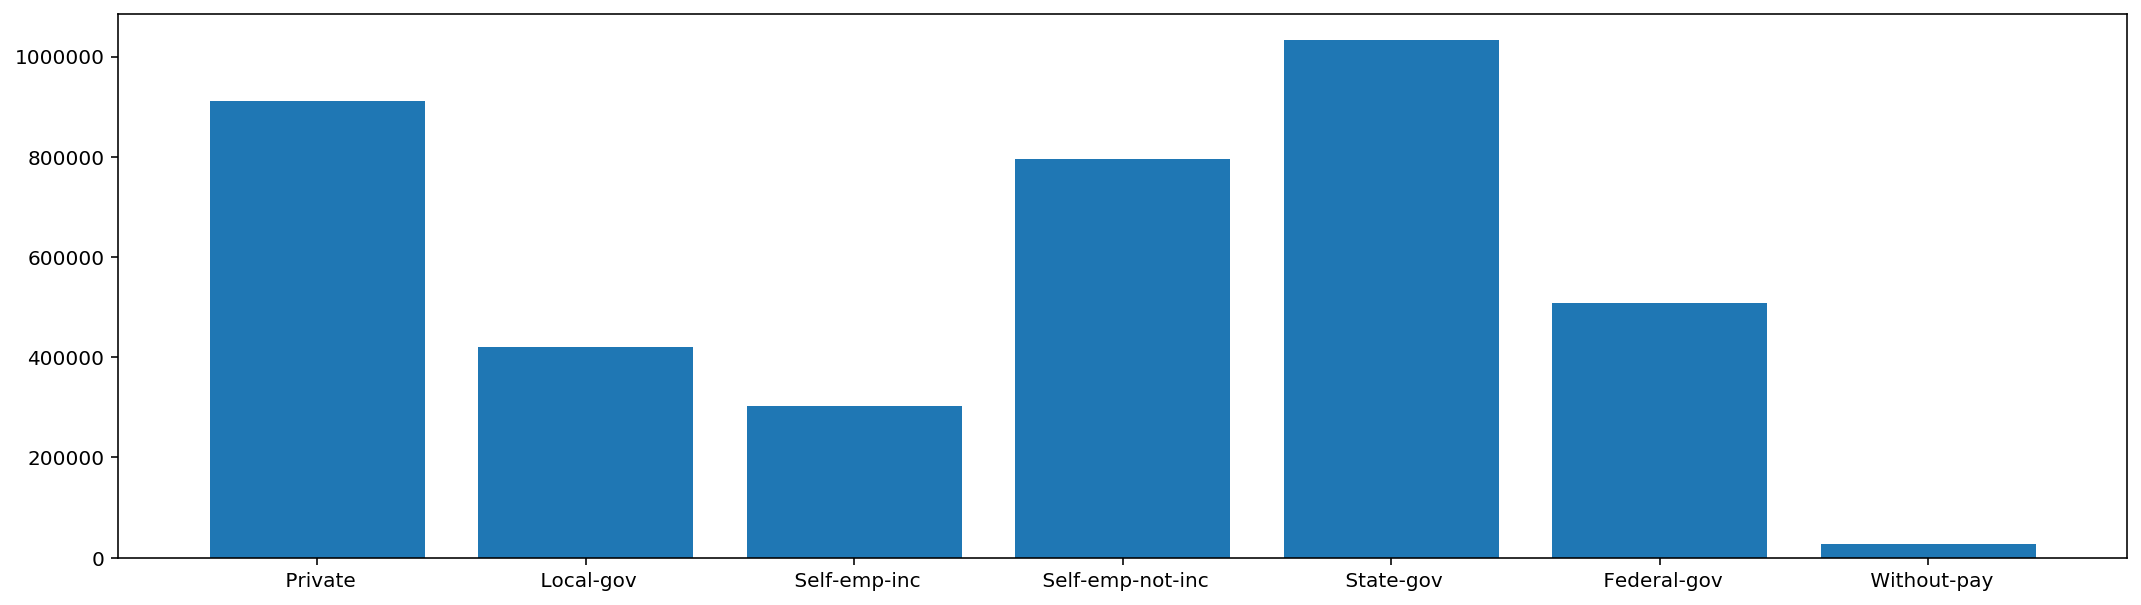

In [39]:
fig,ax=plt.subplots(figsize=(18,5))
df=pd.DataFrame(dataset)
ax.bar(df[' workclass'],df[' fnlwgt'])

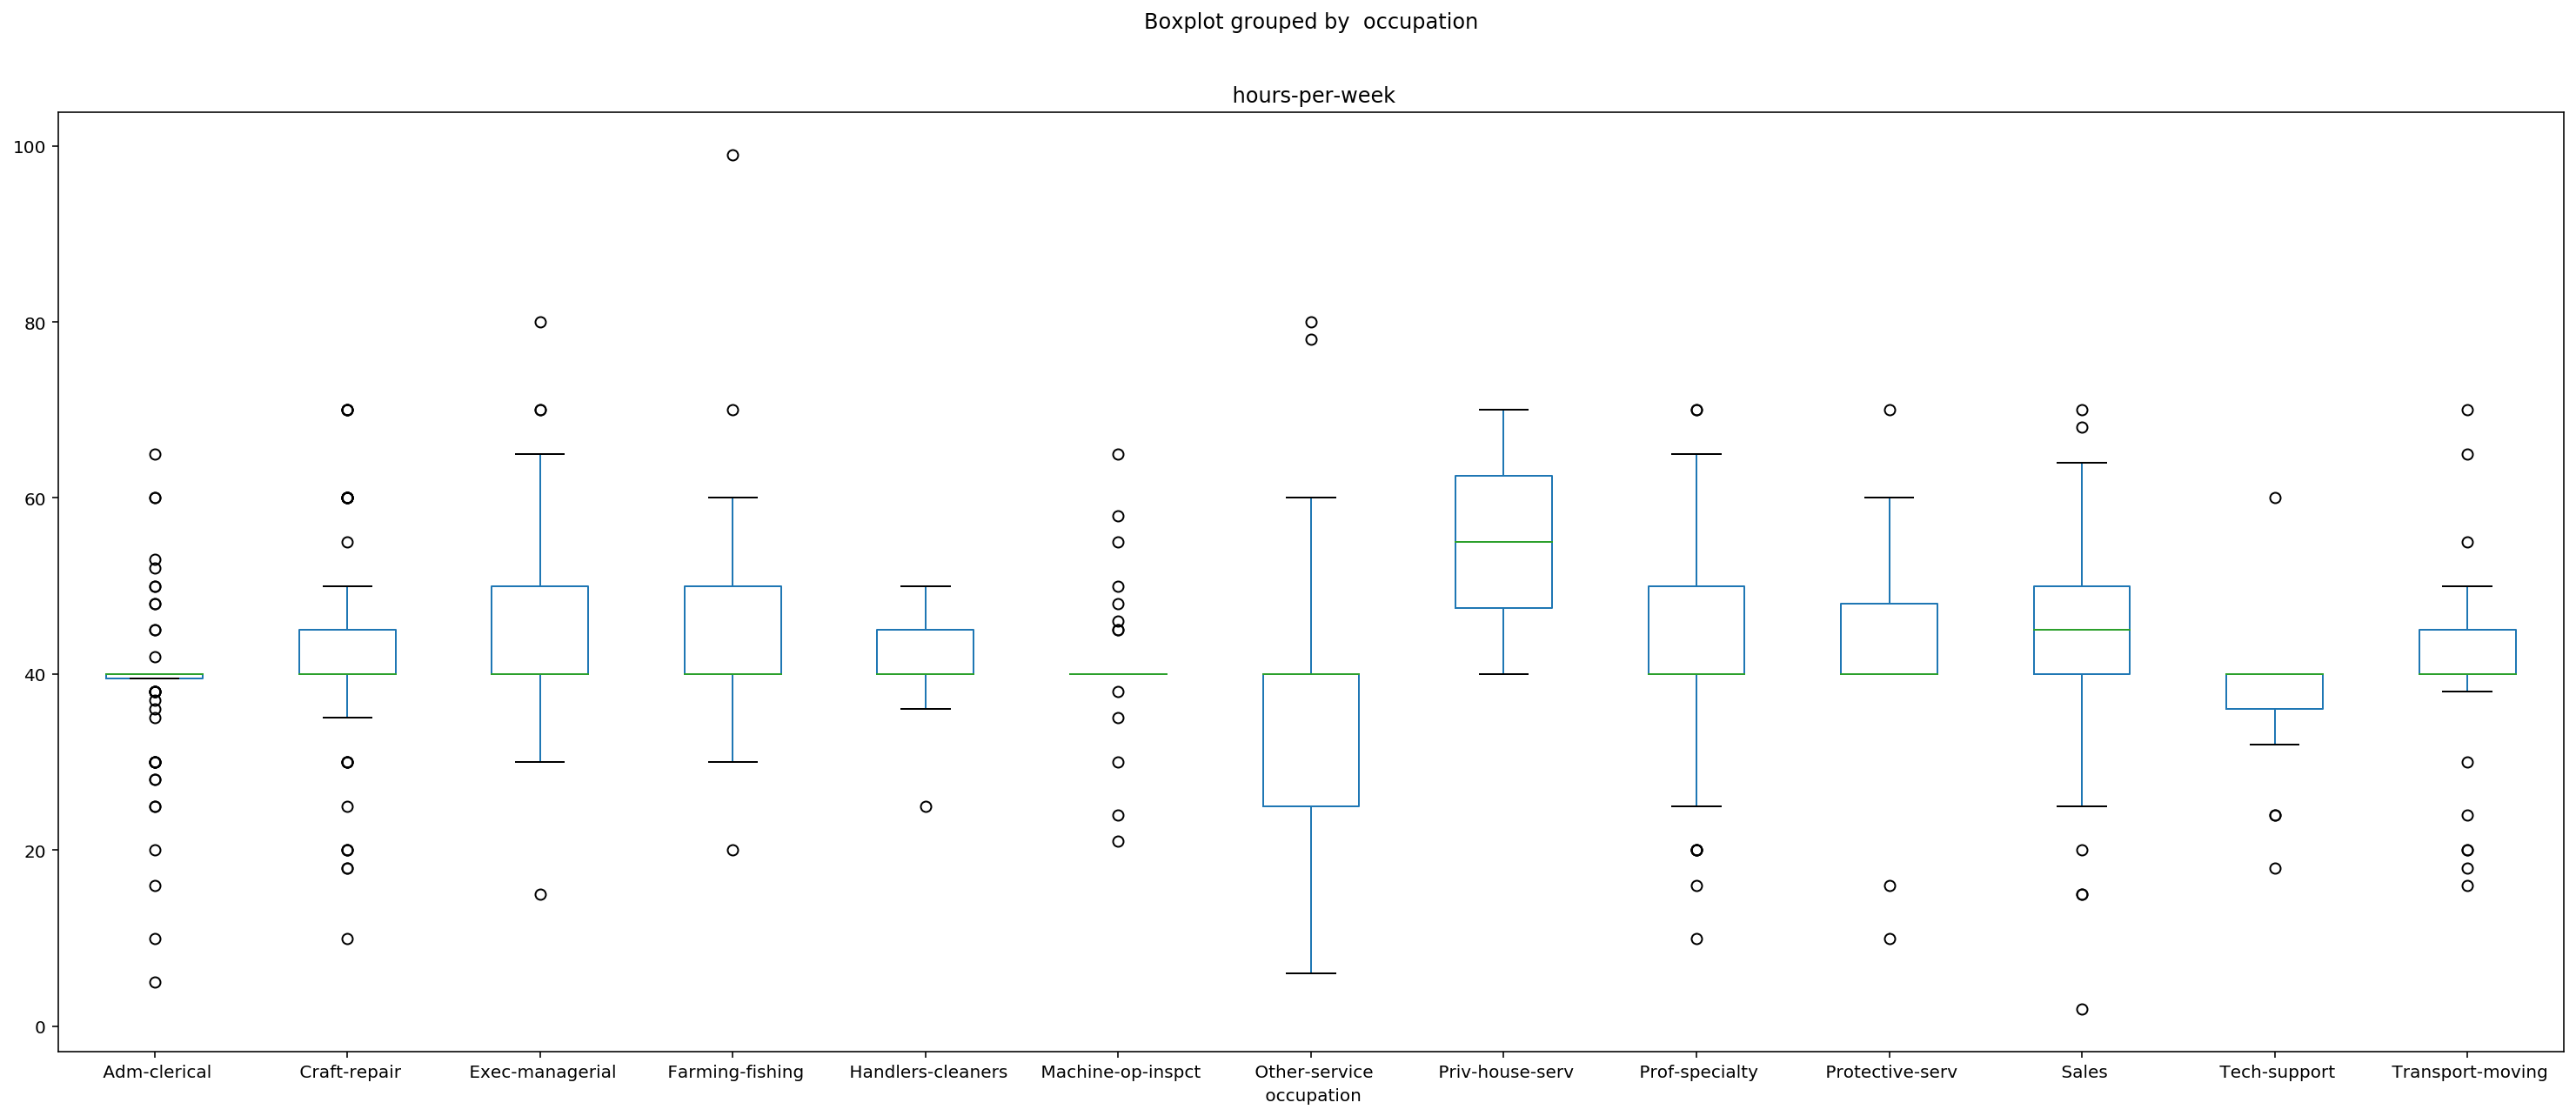

In [40]:
df.boxplot(by =' occupation', column =[' hours-per-week'], grid = False, figsize=(25,10))

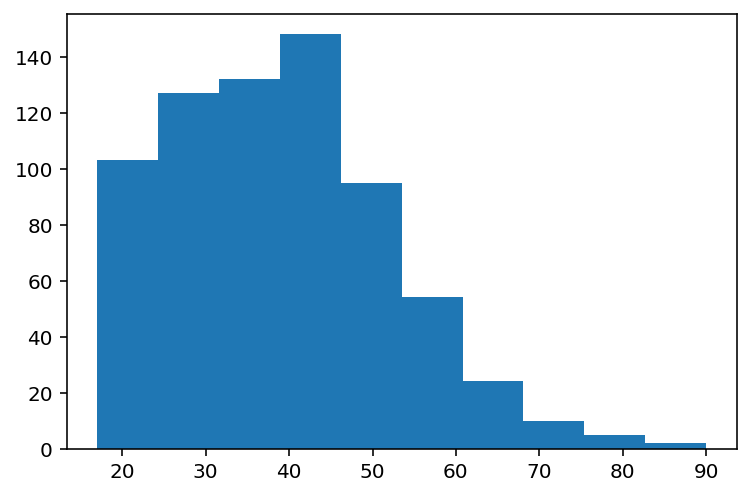

In [41]:
plt.hist(df['age'])
plt.show()

In [42]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

df = pd.DataFrame(dataset)
ztest,pval=stests.ztest(df[' hours-per-week'],x2=None,alternative='two-sided',value=40)
print(float(pval))

if(pval<0.05):
    print("reject null hypothesis")
else:
    print("failed to reject null hypothesis")




7.452424755187133e-05
reject null hypothesis


Text(0.5, 1.0, 'Comparison between the level of education of a person and the hours worked per week')

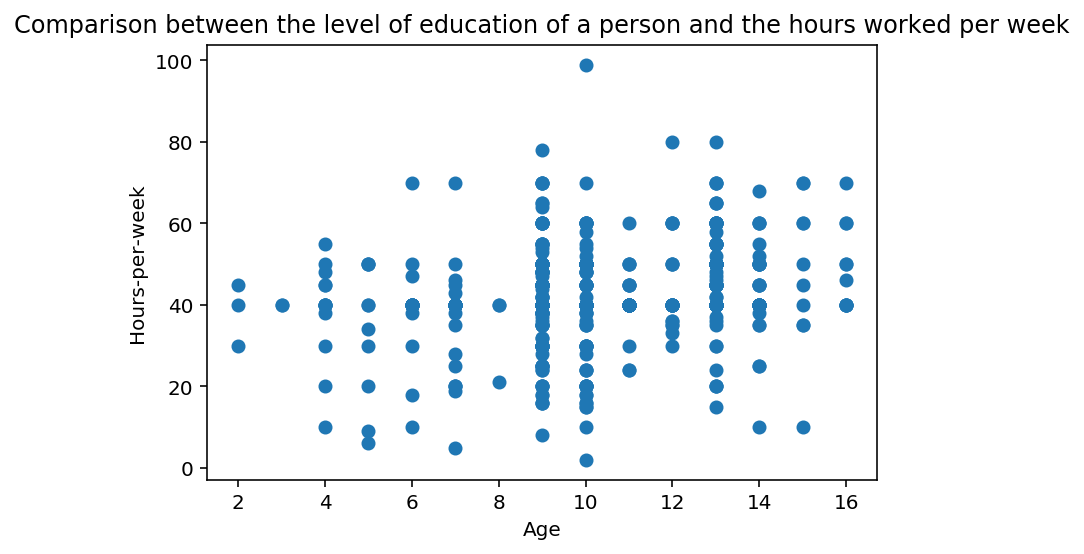

In [43]:
x1=df[' education-num']
x2=df[' hours-per-week']
plt.scatter(x1,x2)
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.title('Comparison between the level of education of a person and the hours worked per week')

In [44]:
#Pearson Correlation
from scipy.stats import pearsonr
corr,p_value=pearsonr(x1,x2)
print(corr)#weak correlation

0.2116797046460458


In [45]:
#Kendall Correlation
from scipy.stats import kendalltau
tau, p_value=kendalltau(x1,x2,initial_lexsort=True)
print(tau)

0.16492452676013514


In [46]:
#Spearman
from scipy.stats import spearmanr
rho,p_value=spearmanr(x1,x2)
print(rho)

0.20621447657728964


0.9286148157929514
32.135882741317815


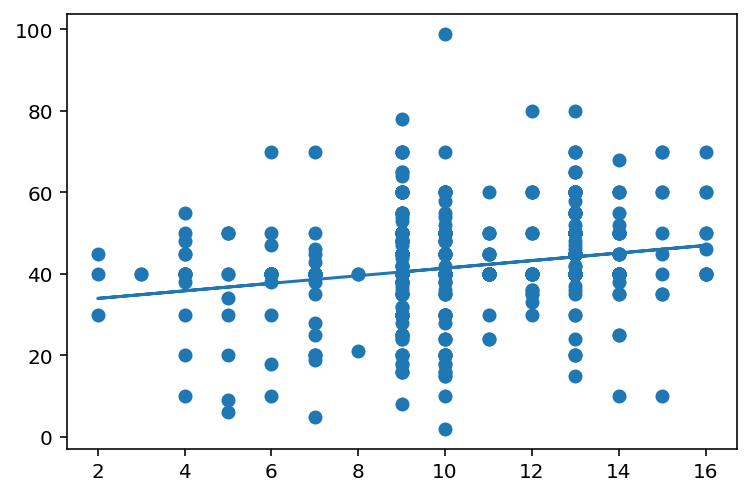

In [47]:
from statistics import mean
m = (((mean(x1)*mean(x2)) - mean(x1*x2)) /
         ((mean(x1)*mean(x1)) - mean(x1*x1)))
print(m)
b = mean(x2) - m*mean(x1)
print(b)
regression_line = [(m*x)+b for x in x1]
plt.scatter(x1,x2)
plt.plot(x1, regression_line)
plt.show()